In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
import random 
import time 

$H_0: p = p_0$ 

$H_1: p > p_0$

In [3]:
α = 0.05 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α)

1.6448536269514722


In [4]:
sample_sizes = np.array( [30, 50, 70] + list( np.arange(100, 2100, 100) ) )
sample_sizes

array([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
        900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
       2000])

In [5]:
p0s = np.arange(0.01, 0.21, 0.01)
p0s 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [6]:
st = time.time()

errors_total = []

for p0 in p0s: 

    errors_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 

        samples = np.random.binomial(1, p0, (100000, n))  
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values >= z_α).astype(int) 
        type_I_error_sim = np.mean(decisions) 
        
        errors_per_n[k] = type_I_error_sim
    
    errors_total += errors_per_n

print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 1262.011082649231 seconds


In [7]:
print( 
    len(errors_total), 
    len(sample_sizes), 
    len(p0s)
) 

460 23 20


In [8]:
a = [p0s[0]] * len(sample_sizes)

for i in range(1, len(p0s)): 
    a += [list(p0s)[i]] * len(sample_sizes)
    
#print(a)
len(a)

460

In [9]:
b = list(pd.Series(a).round(2))

In [10]:
d = {"p0": b, "n": list(sample_sizes) * len(p0s), "type_I_error": errors_total}
df = pd.DataFrame(d)
df

,p0,n,type_I_error
0,0.01,30,0.03630
1,0.01,50,0.01382
2,0.01,70,0.03325
3,0.01,100,0.01846
4,0.01,200,0.05223
...,...,...,...
455,0.20,1600,0.05019
456,0.20,1700,0.04895
457,0.20,1800,0.04733
458,0.20,1900,0.04610


In [11]:
df.dtypes

p0              float64
n                 int32
type_I_error    float64
dtype: object

In [12]:
df = df
df["p0"] = df["p0"].astype(str)
df.dtypes 

p0               object
n                 int32
type_I_error    float64
dtype: object

In [13]:
df = df.pivot_table(values = "type_I_error", index = "n", columns = "p0")
df

p0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2
n,,,,,,,,,,,,,,,,,,,,
30,0.03630,0.02279,0.01199,0.03004,0.01553,0.03145,0.05517,0.03022,0.04689,0.02536,0.04158,0.06083,0.03385,0.05068,0.02845,0.04029,0.05604,0.03177,0.04630,0.06134
50,0.01382,0.01726,0.01721,0.04851,0.03812,0.02884,0.02197,0.04336,0.03249,0.05802,0.04334,0.03275,0.05401,0.04016,0.03008,0.04867,0.03604,0.05476,0.04067,0.03064
70,0.03325,0.05138,0.01943,0.02180,0.02436,0.02426,0.05507,0.05052,0.04726,0.04525,0.04050,0.03686,0.03310,0.03023,0.05376,0.04785,0.04183,0.03892,0.03387,0.05528
100,0.01846,0.05111,0.03124,0.04792,0.02701,0.03812,0.04681,0.02852,0.03348,0.03968,0.04465,0.05091,0.03277,0.03579,0.03854,0.04221,0.04735,0.05012,0.05348,0.05659
200,0.05223,0.04978,0.04009,0.03090,0.04428,0.03385,0.04000,0.05065,0.03609,0.04501,0.04898,0.03726,0.04059,0.04456,0.05077,0.05402,0.03996,0.04240,0.04659,0.04953
300,0.03320,0.04117,0.03903,0.03474,0.04919,0.03976,0.04977,0.03976,0.04841,0.03816,0.04457,0.04771,0.03933,0.04288,0.04684,0.05076,0.04176,0.04478,0.04802,0.05081
400,0.05083,0.03208,0.03531,0.03365,0.04871,0.04067,0.05167,0.04379,0.05235,0.04327,0.04942,0.04116,0.04616,0.05057,0.04252,0.04598,0.05130,0.04135,0.04502,0.04802
500,0.03045,0.04712,0.05108,0.04870,0.04496,0.04179,0.05176,0.04581,0.03966,0.04648,0.03996,0.04590,0.05252,0.04533,0.04864,0.05178,0.04442,0.04758,0.05137,0.04481
600,0.04260,0.03521,0.04134,0.04399,0.04115,0.03982,0.05055,0.04496,0.04039,0.04758,0.04191,0.04830,0.04188,0.04488,0.05065,0.04432,0.04725,0.05206,0.04433,0.04746


In [14]:
df.columns

Index(['0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09',
       '0.1', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18',
       '0.19', '0.2'],
      dtype='object', name='p0')

In [15]:
df["0.07"].index

Int64Index([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
             900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
            2000],
           dtype='int64', name='n')

In [16]:
import matplotlib as mpl 
mpl.rcParams["font.family"] = "Times New Roman" 
mpl.rcParams["font.style"] = "normal" 

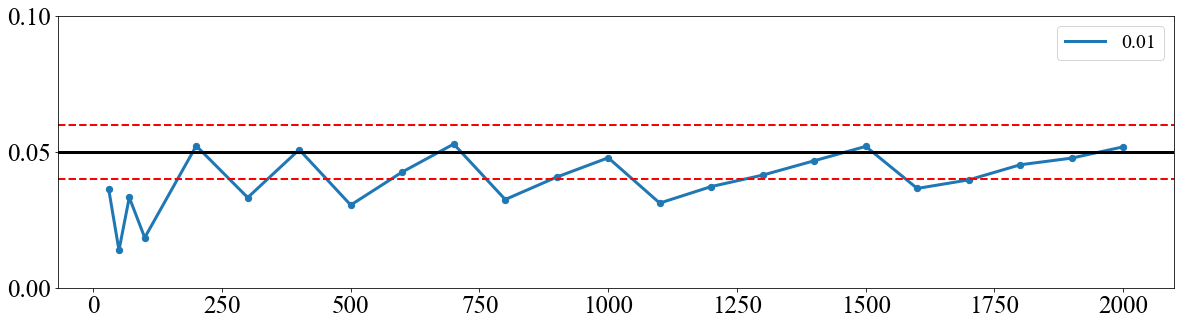

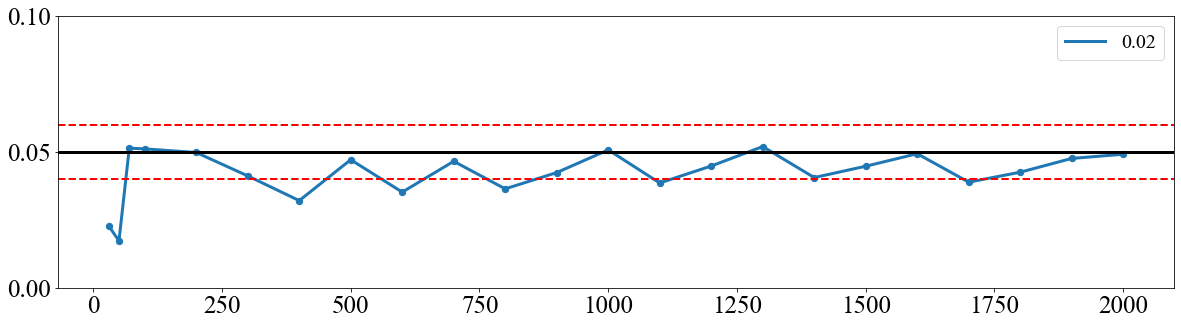

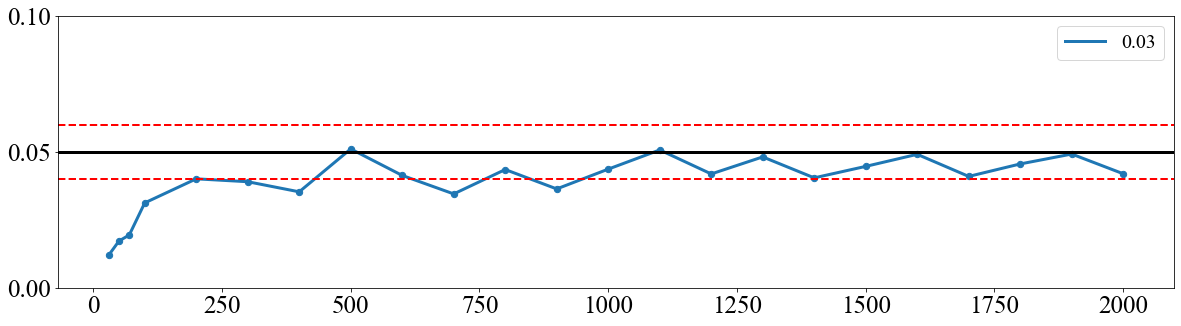

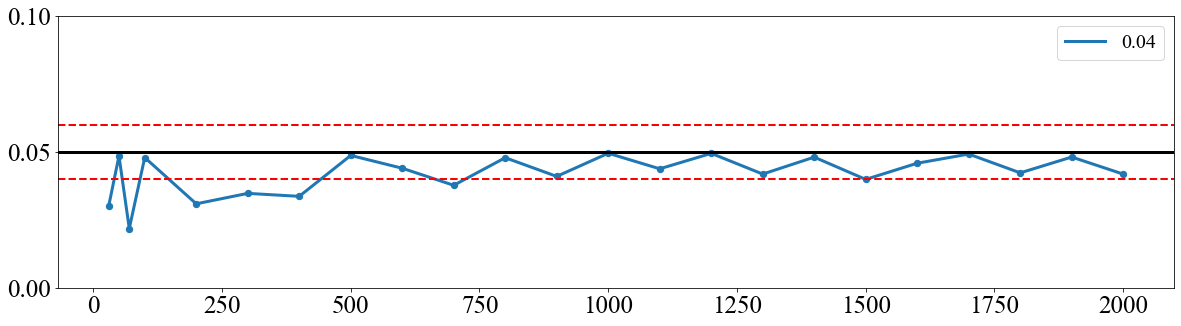

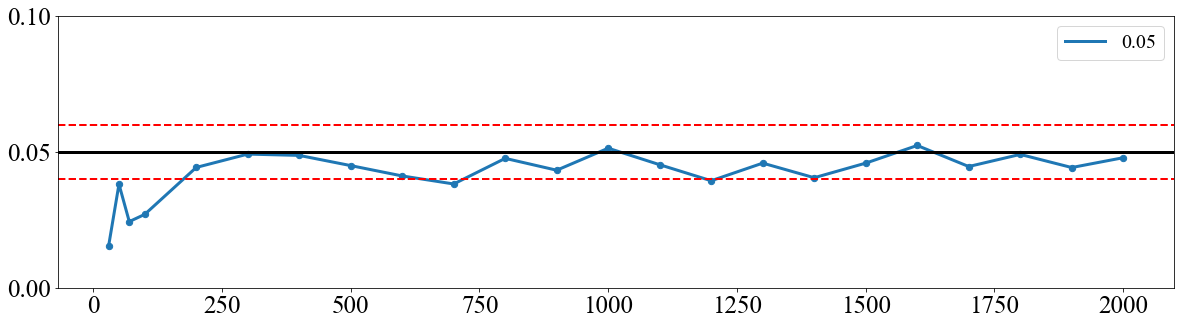

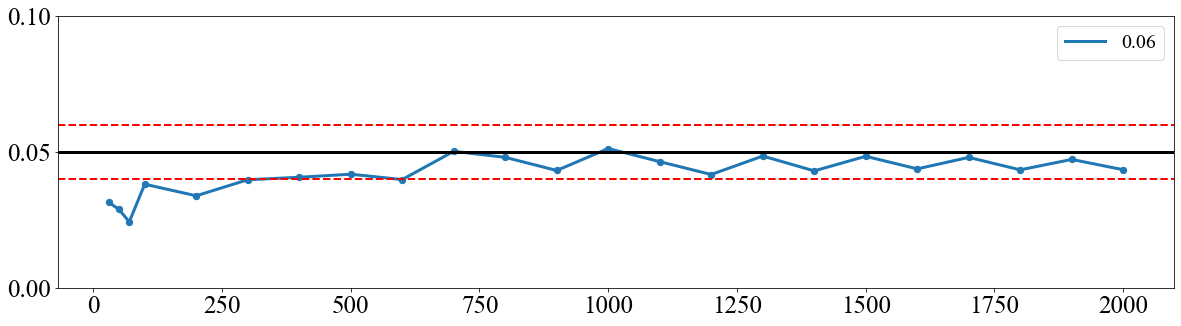

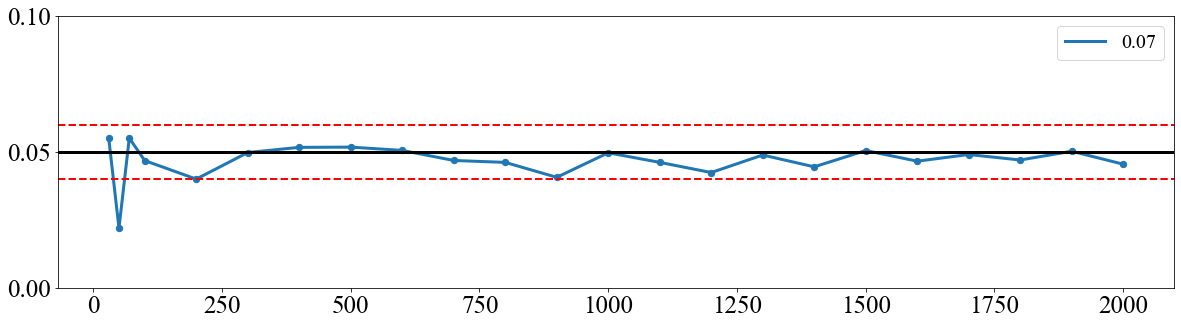

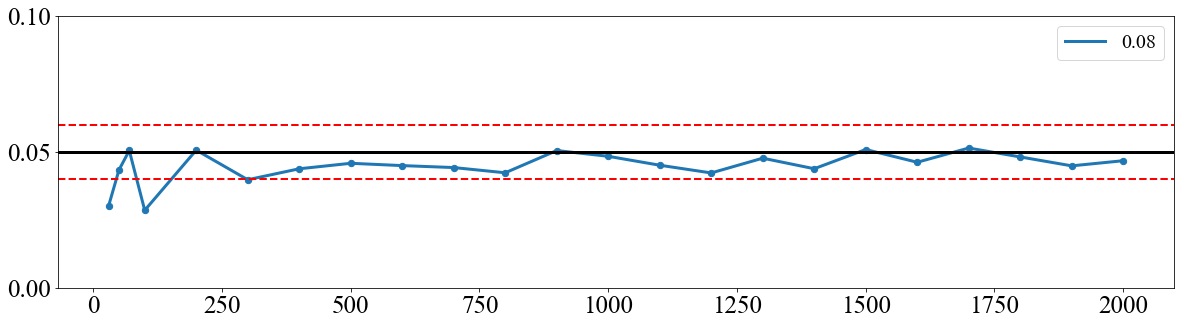

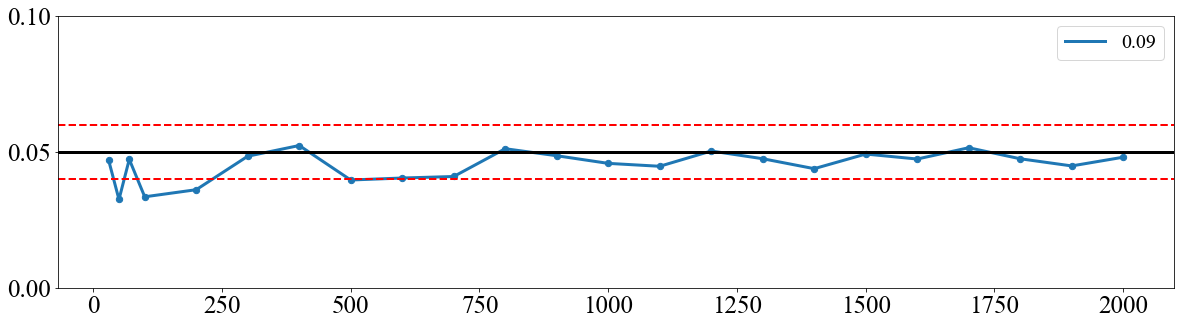

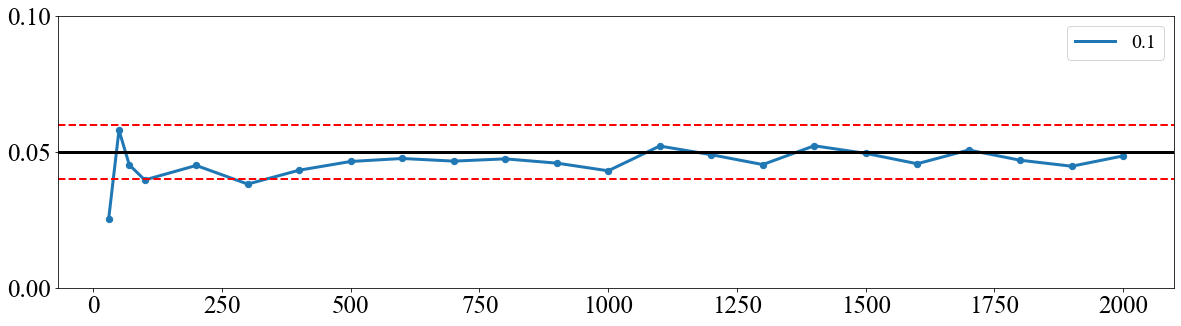

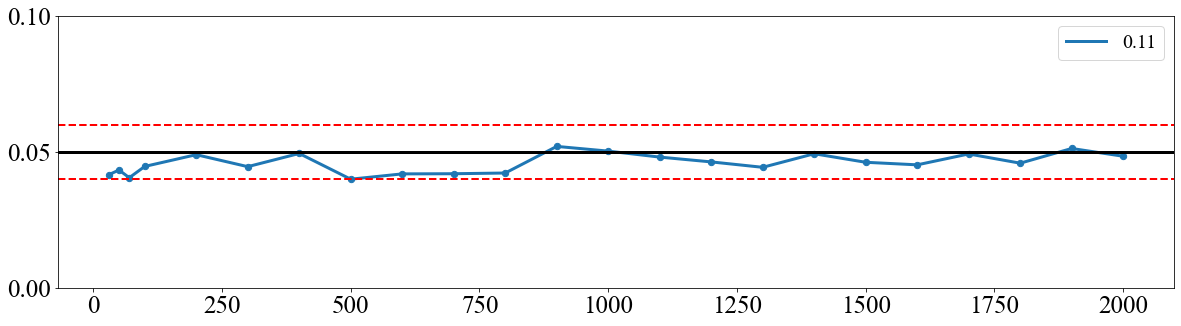

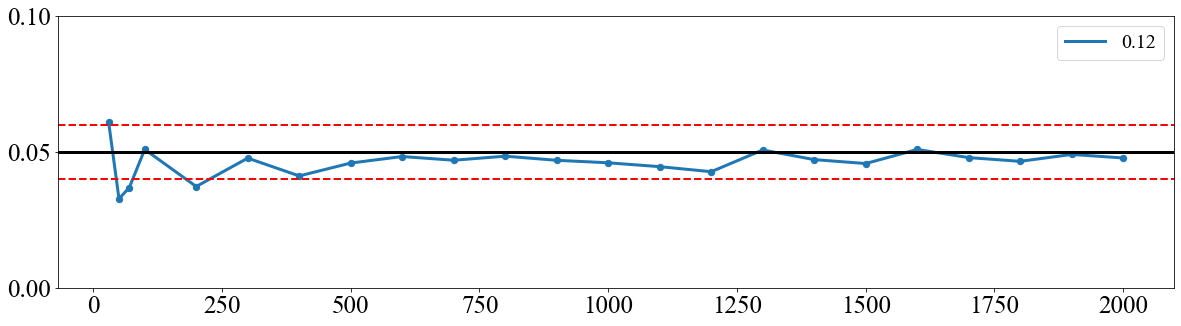

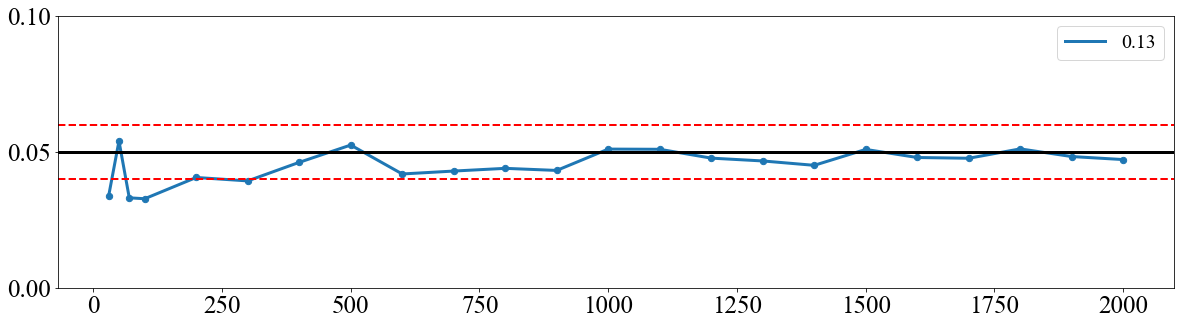

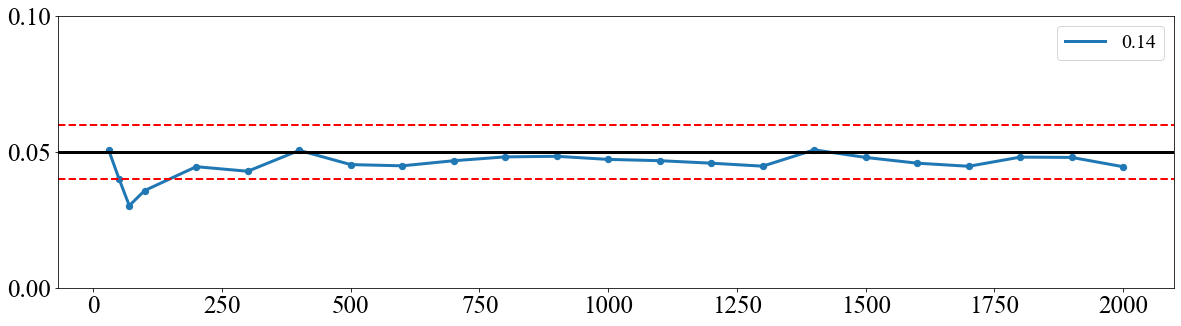

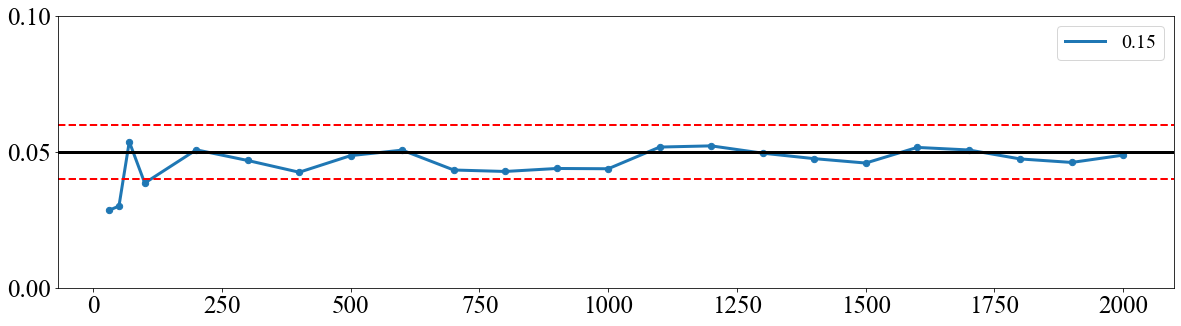

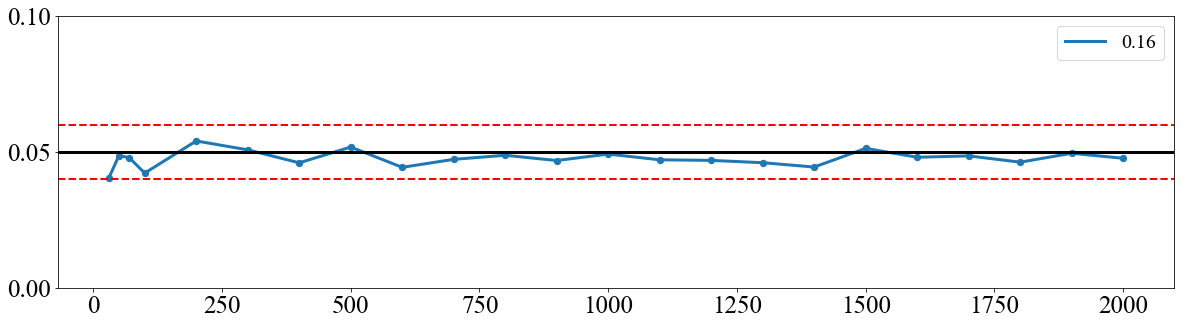

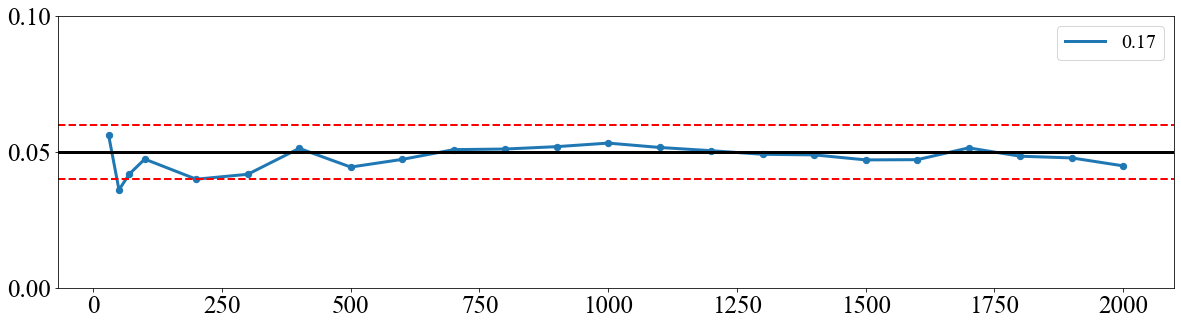

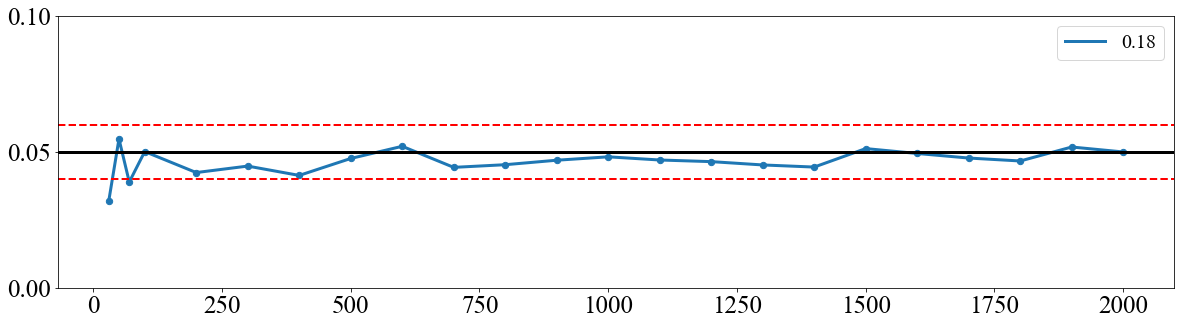

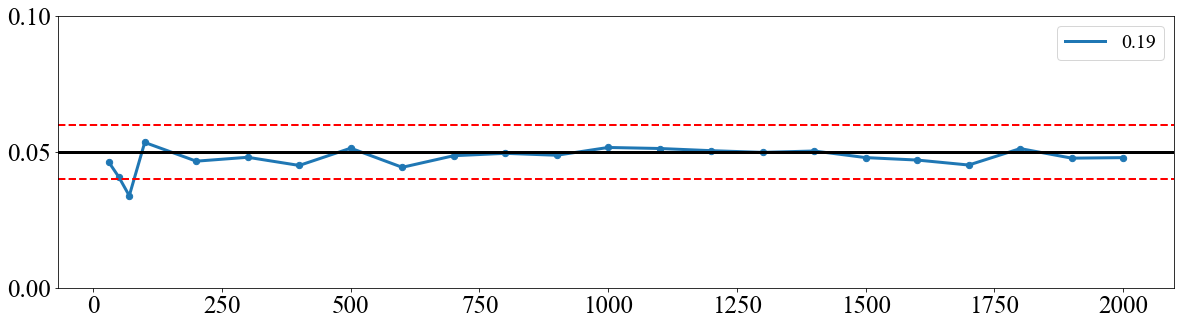

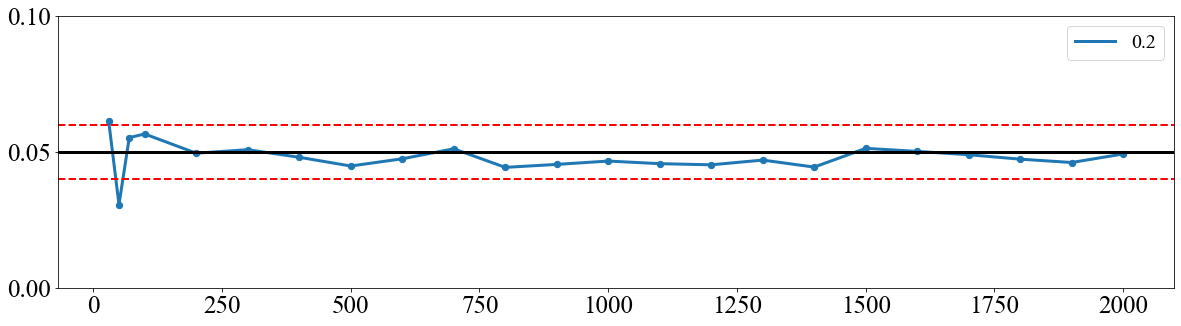

In [17]:
for c in df.columns: 
    plt.figure(figsize = (20, 5)) 
    plt.scatter(x = df[c].index, y = df[c], s = 40) 
    plt.plot(df[c].index, df[c], "-", label = c, linewidth = 3) 
    plt.axhline(α, color = 'black', linewidth = 3)  
    plt.axhline(α + 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    plt.axhline(α - 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    plt.ylim([0, .1]) 
    plt.xticks(fontsize = 25) 
    plt.yticks([0, α, .1], fontsize = 25)
    #plt.yticks(list(np.arange(0, .11, .01)))
    plt.legend(fontsize = 20) 
    plt.show() 